In [2]:
import numpy as np
import torch
from dataset import ImageDataset
from config import config as cfg
import PIL
import cv2
import matplotlib.pyplot as plt
import sklearn
import pickle
import joblib

In [3]:
kmeans = joblib.load('/Users/dongdori/workspace/codespace/paper_implementation/pytorch_imageGPT/output/kmeans_palette.pkl')
palettes = kmeans.cluster_centers_

In [23]:
def rgb_to_palette(pixels, kmeans):
    batch_size, n_channel, h, w = pixels.size()
    pixels = pixels.permute(0,2,3,1).reshape(batch_size*h*w, 3)
    nbit = kmeans.predict(pixels.numpy().astype(np.float32))
    nbit = torch.LongTensor(nbit.reshape(batch_size, h*w))
    return nbit 

In [24]:
x = torch.randn(32, 3, 32, 32)
out = rgb_to_palette(x, kmeans)

In [26]:
out

tensor([[433, 310, 473,  ...,  51, 129,  51],
        [ 92, 109, 257,  ..., 436, 129, 426],
        [ 70, 257,   1,  ...,  94,  51,  51],
        ...,
        [ 94,  28, 207,  ..., 256, 436, 129],
        [ 70, 109, 426,  ...,  85,  85, 231],
        [ 51,  26,  51,  ..., 159,  94, 103]])

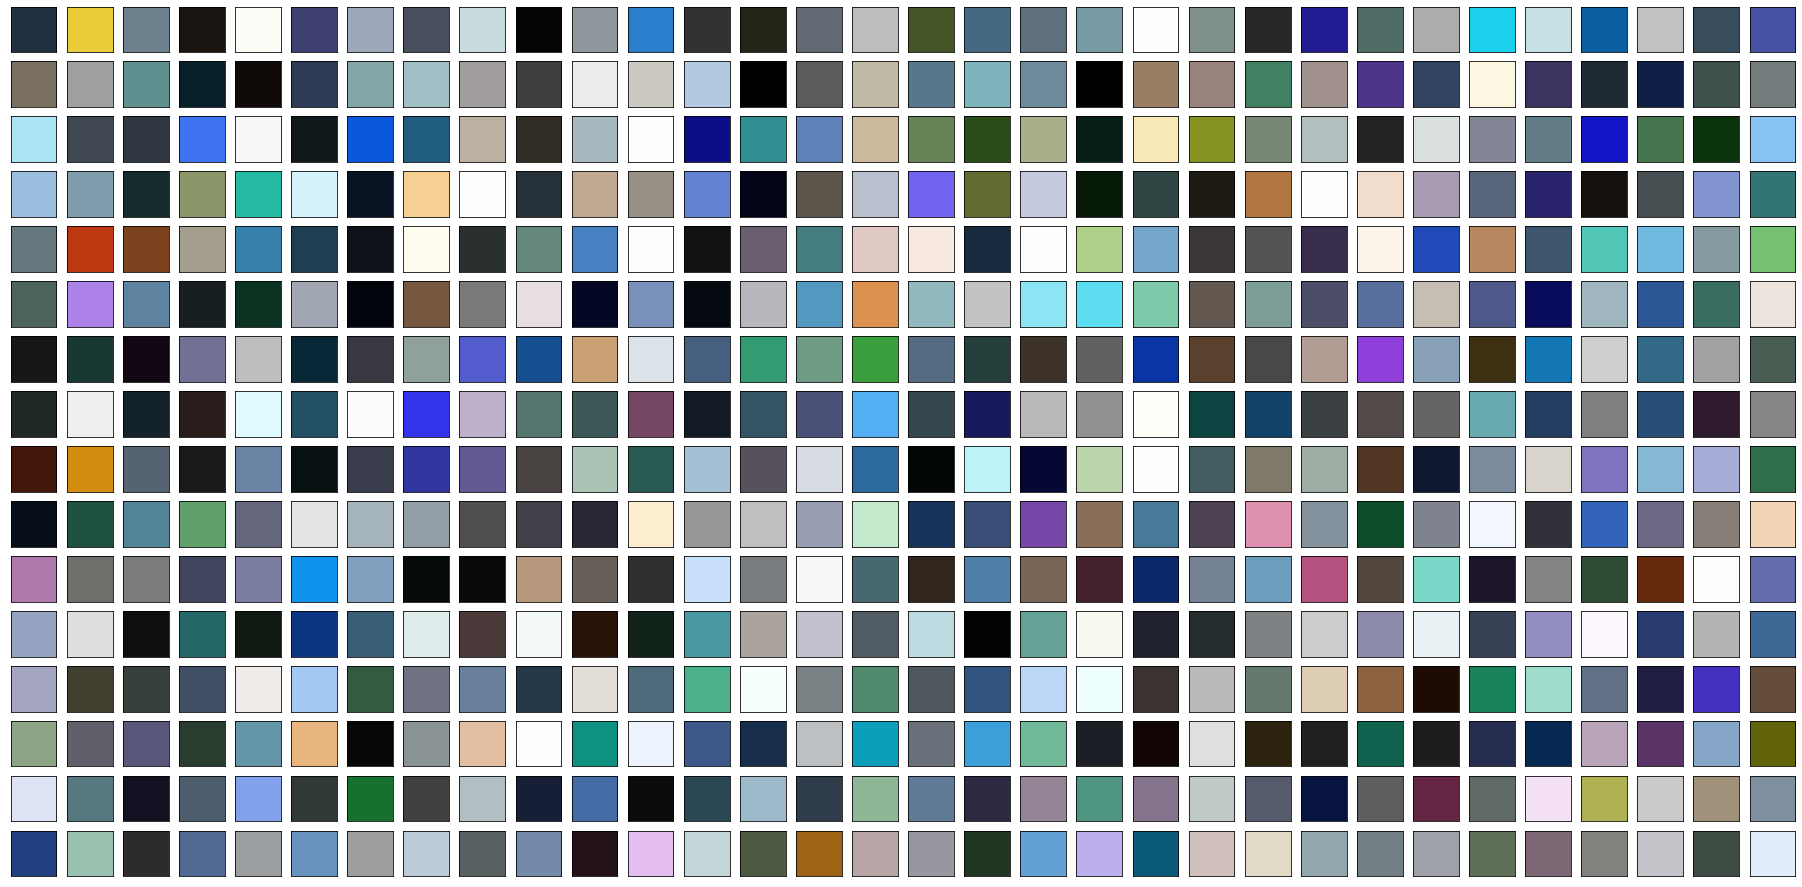

In [55]:
fig = plt.figure(figsize = (32, 16))

for i in range(512):
    plt.subplot(16,32,i+1)    
    plt.imshow(palettes[i].reshape(1,1,3))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')